<a href="https://colab.research.google.com/github/Arjun2099/Scaling-Neuron-Models-with-GPU/blob/AdEx-Model-tests/AdEx_Model_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCUDA Test 1

In [ ]:
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2022.2.2-cp310-cp310-linux_x86_64.whl size=661263 sha256=736a3d17cf6de8d01d76542d97dcfffb227f414121ecf4c12098cb306991ee5d
  Stored in directory: /root/.cache/pip/wheels/1d/7b/06/82a395a243fce00035dea9914d92bbef0013401497d849f8bc
Successfully built pycuda


In [ ]:
import numpy as np
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
from pycuda import gpuarray

In [ ]:
# CUDA C code as a string
cuda_code = """
    __global__ void my_gpu_function(float *input, float *output, int size) {
        int idx = threadIdx.x + blockDim.x * blockIdx.x;
        if (idx < size) {
            output[idx] = input[idx] * 2.0;
        }
    }
"""

# Compile the CUDA code and create a callable GPU function
mod = SourceModule(cuda_code)
my_gpu_function = mod.get_function("my_gpu_function")

In [ ]:
class AdExCell:
    def __init__(self):
        self.Cm = 200
        self.Gl = 10
        self.El = -70
        self.delta = 2
        self.Vt = -50
        self.a = 2
        self.Tw = 30
        self.b = 0
        self.Vr = -58
        self.Vm = -70
        self.w = 0
        self.Iin = 500
        self.dt = 0  # Integration time (not initialized in the Java code)

    def set_defaults(self):
        self.Cm = 200
        self.Gl = 10
        self.El = -70
        self.delta = 2
        self.Vt = -50
        self.a = 2
        self.Tw = 30
        self.b = 0
        self.Vr = -58
        self.Vm = -70
        self.w = 0
        self.Iin = 500

    def set_as_GoC(self):
        self.Cm = 500
        self.Gl = 13.1
        self.El = -58
        self.delta = 7
        self.Vt = -54
        self.a = -10
        self.b = 1033
        self.Tw = 8.7
        self.Vr = -50
        self.Vm = -70
        self.w = 0
        self.Iin = 500

    def set_as_GrC(self):
        self.Cm = 12.93
        self.Gl = 10
        self.El = -70
        self.delta = 5
        self.Vt = -50
        self.a = -9
        self.b = 180
        self.Tw = 0.09
        self.Vr = -64
        self.Vm = -70
        self.w = 0
        self.Iin = 10

    # Define other methods similarly

    def set_user_defined(self, cap, gleak, Eleak, del_val, thre, al, tauw, bif, rev, input_val):
        self.Cm = cap
        self.Gl = gleak
        self.El = Eleak
        self.delta = del_val
        self.Vt = thre
        self.a = al
        self.Tw = tauw
        self.b = bif
        self.Vr = rev
        self.Iin = input_val

    def get_Cm(self):
        return self.Cm

    def set_Cm(self, Cm):
        self.Cm = Cm

    def get_RestVm(self):
        return self.RestVm

    def set_RestVm(self, RestVm):
        self.RestVm = RestVm

    def get_Vm(self):
        return self.Vm

    def set_Vm(self, Vm):
        self.Vm = Vm


In [ ]:
pip install matplotlib

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

Inside AdEx firing...
Inside AdEx store data...
Inside AdEx firing...
Inside AdEx store data...
Inside AdEx firing...
Inside AdEx store data...


<ipython-input-10-ac0a26cabe81>:105: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
<ipython-input-10-ac0a26cabe81>:105: RuntimeWarning: invalid value encountered in double_scalars
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


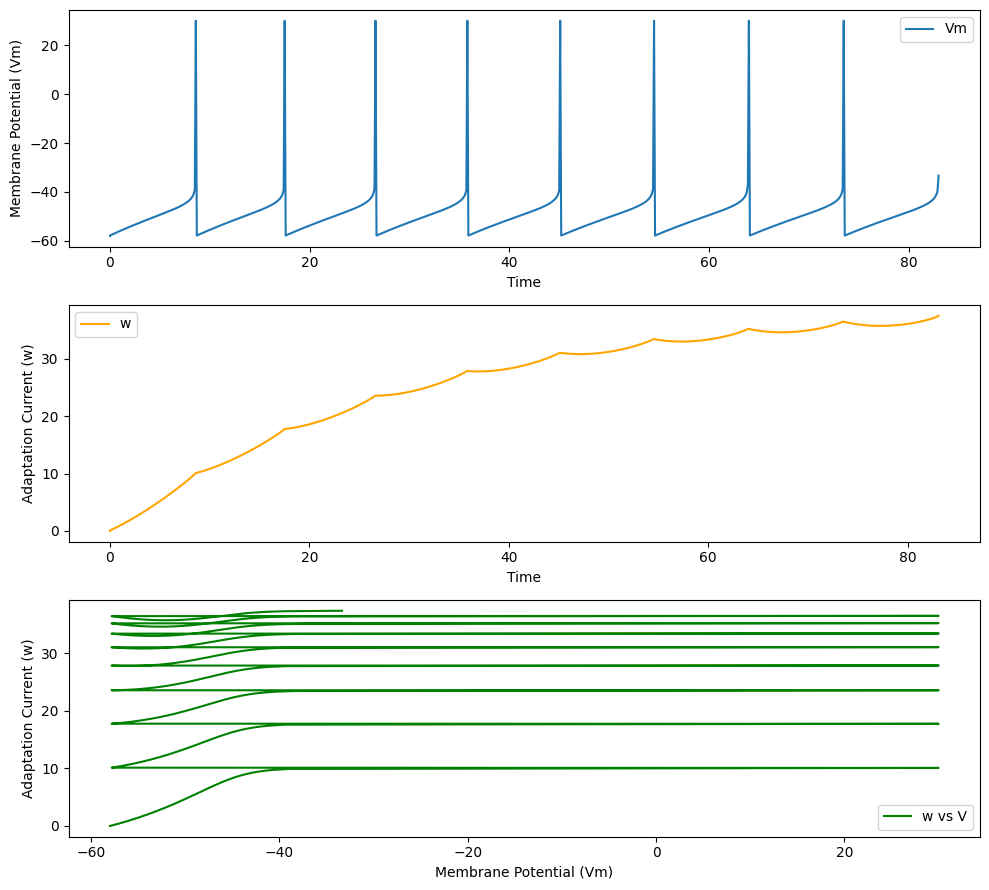

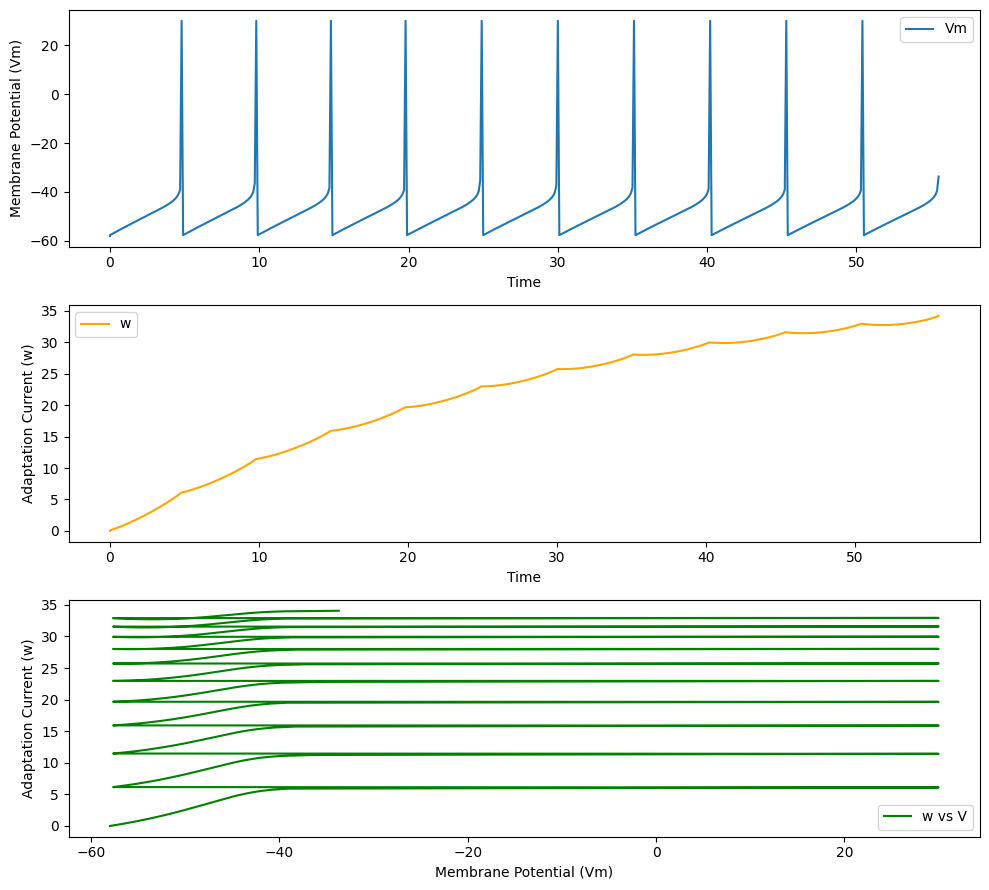

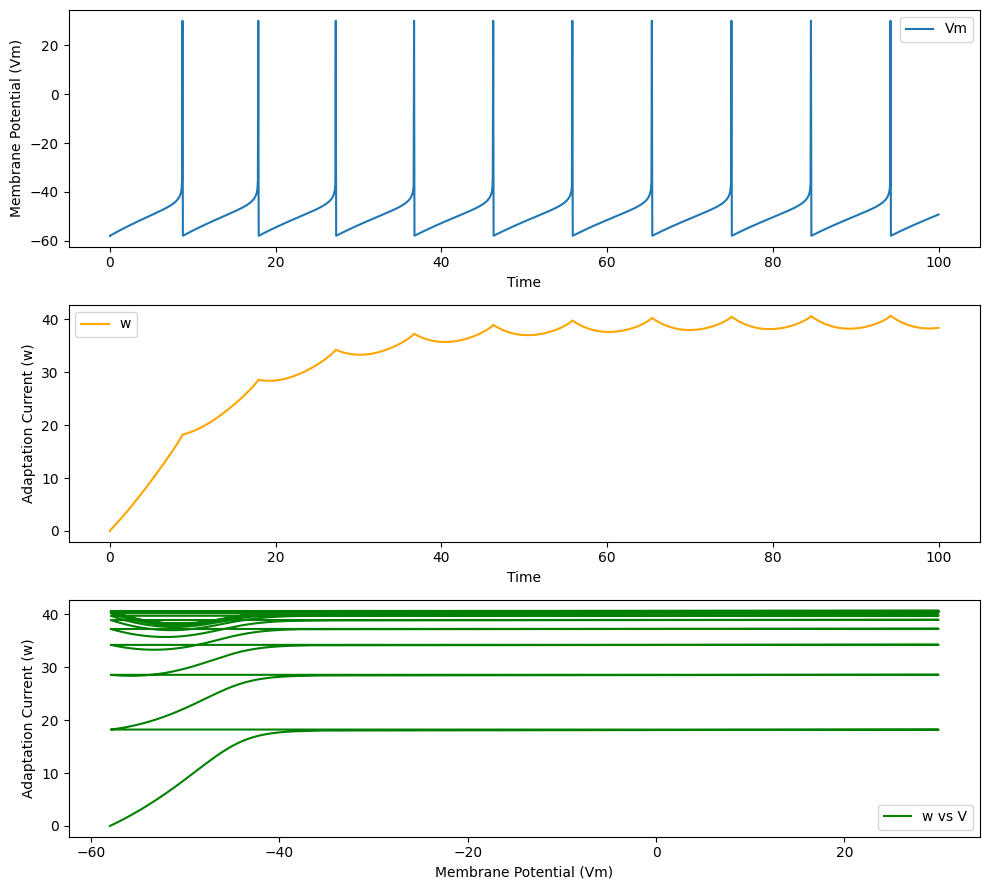

In [ ]:
class AdExCell:
    def __init__(self):
        self.Cm = 200
        self.Gl = 10
        self.El = -70
        self.delta = 2
        self.Vt = -50
        self.a = 2
        self.Tw = 30
        self.b = 0
        self.Vr = -58
        self.Vm = -70
        self.w = 0
        self.Iin = 500
        self.ISynArray = []

class Experiment:
    def __init__(self):
        self.StartTime = 0
        self.EndTime = 100
        self.dt = 0.1
        self.InI = 500

class AdExModel(AdExCell):
    def __init__(self, ex, ID):
        super().__init__()
        self.E = ex
        self.id = ID
        self.size = int((self.E.EndTime - self.E.StartTime) / self.E.dt)
        self.VmArray = [0.0] * (self.size + 2)
        self.IStimArray = [0.0] * (self.size + 2)
        self.IsRoot = True
        self.Iin = ex.InI
        self.TimeArray = []
        self.wArray = []
        self.Vm = self.Vr  # Initialize Vm
        self.ISynArray = [0.0] * (self.size + 2)  # Initialize ISynArray

    def stimulate(self, Iin=None, Vt=None, Tw=None):
        if Iin is not None:
            self.Iin = Iin
        if Vt is not None:
            self.Vt = Vt
        if Tw is not None:
            self.Tw = Tw

        print("Inside AdEx firing...")
        elapsed = self.E.StartTime
        i = 0
        self.TimeArray.append(elapsed)
        self.VmArray[i] = self.Vm
        self.wArray.append(self.w)
        while elapsed < self.E.EndTime:
            if not self.IsRoot:
                self.Iin = self.ISynArray[i]
            i += 1
            self.RungekuttaSolver_AdExLif(elapsed, self.Vm, self.w, self.Iin)
            if self.Vm > -32:
                self.VmArray[i] = 30
                self.Vm = self.Vr
                self.w += self.b
            else:
                self.VmArray[i] = self.Vm
            self.TimeArray.append(elapsed)
            self.wArray.append(self.w)
            elapsed += self.E.dt
        self.StoreData(self.VmArray, self.TimeArray, self.wArray, self.size)
        return self.VmArray

    # Custom exponential function so that math range error is not occured
    def custom_exp(self, x):
        if x > 100:
            return float('inf')
        elif x < -100:
            return 0.0
        else:
            return math.exp(x)

    def getAdaptation(self):
        return self.wArray

    def RungekuttaSolver_AdExLif(self, t, Vm, w, input):
        k1_v, k2_v, k3_v, k4_v, KV = 0, 0, 0, 0, 0
        k1_w, k2_w, k3_w, k4_w, KW = 0, 0, 0, 0, 0

        k1_v = self.DeltaV(t, Vm, w, input)
        k1_w = self.DeltaW(t, Vm, w)

        k2_v = self.DeltaV(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k1_v, w + (self.E.dt / 2) * k1_v, input)
        k2_w = self.DeltaW(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k1_w, w + (self.E.dt / 2) * k1_w)

        k3_v = self.DeltaV(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k2_v, w + (self.E.dt / 2) * k2_v, input)
        k3_w = self.DeltaW(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k2_w, w + (self.E.dt / 2) * k2_w)

        k4_v = self.DeltaV(t + self.E.dt, Vm + self.E.dt * k3_v, w + self.E.dt * k3_v, input)
        k4_w = self.DeltaW(t + self.E.dt, Vm + self.E.dt * k3_w, w + self.E.dt * k3_w)

        KV = self.E.dt * ((k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6)
        self.Vm += KV
        KW = self.E.dt * ((k1_w + 2 * k2_w + 2 * k3_w + k4_w) / 6)
        self.w += KW

    def DeltaV(self, t, v, w, input):
        if self.IsRoot:
            return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
        elif not self.IsRoot:
            return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w - input) / self.Cm)
        else:
            return 0

    def plot_results(self):
        plt.figure(figsize=(10, 9))
        plt.subplot(3, 1, 1)
        plt.plot(self.TimeArray, self.VmArray, label='Vm')
        plt.xlabel('Time')
        plt.ylabel('Membrane Potential (Vm)')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(self.TimeArray, self.wArray, label='w', color='orange')
        plt.xlabel('Time')
        plt.ylabel('Adaptation Current (w)')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(self.VmArray, self.wArray, label='w vs V', color='green')
        plt.xlabel('Membrane Potential (Vm)')
        plt.ylabel('Adaptation Current (w)')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def DeltaW(self, t, v, w):
        return ((self.a * (v - self.El) - w) / self.Tw)

    def StoreData(self, v, t, w, size):
        print("Inside AdEx store data...")
        filename = "AdExResult" + str(self.id) + ".csv"
        with open(filename, "w") as f:
            f.write("Time,Voltage,w\n")
            for i in range(size):
                f.write(f"{t[i]},{v[i]},{w[i]}\n")

ex1 = Experiment()
ex2 = Experiment()
ex2.InI = 800
ex3 = Experiment()
ex3.dt = 0.05

adex_model1 = AdExModel(ex1, 1)
adex_model2 = AdExModel(ex2, 2)
adex_model3 = AdExModel(ex3, 3)

# Varying input parameters for different simulations
adex_model1.stimulate(Iin=500, Vt=-50, Tw=30)
adex_model2.stimulate(Iin=800, Vt=-50, Tw=30)
adex_model3.stimulate(Iin=500, Vt=-50, Tw=15)

# Plot the results
adex_model1.plot_results()
adex_model2.plot_results()
adex_model3.plot_results()

# Main Code

In [ ]:
class AdExCell:
    def __init__(self):
        self.Cm = 200
        self.Gl = 10
        self.El = -70
        self.delta = 2
        self.Vt = -50
        self.a = 2
        self.Tw = 30
        self.b = 0
        self.Vr = -58
        self.Vm = -70
        self.w = 0
        self.Iin = 500
        self.ISynArray = []

class Experiment:
    def __init__(self):
        self.StartTime = 0
        self.EndTime = 200
        self.dt = 0.1
        self.InI = 500

class AdExModel(AdExCell):
    def __init__(self, ex, ID):
        super().__init__()
        self.E = ex
        self.id = ID
        self.size = int((self.E.EndTime - self.E.StartTime) / self.E.dt)
        self.VmArray = [0.0] * (self.size + 2)
        self.IStimArray = [0.0] * (self.size + 2)
        self.IsRoot = True
        self.Iin = ex.InI
        self.TimeArray = []
        self.wArray = []
        self.Vm = self.Vr  # Initialize Vm
        self.ISynArray = [0.0] * (self.size + 2)  # Initialize ISynArray

    def stimulate(self, Cm, Gl, El, Vt, delta, a, Tw, b, Vr, Iin):
        if Cm is not None:
            self.Cm = Cm
        if Gl is not None:
            self.Gl = Gl
        if El is not None:
            self.El = El
        if delta is not None:
            self.delta = delta
        if Vt is not None:
            self.Vt = Vt
        if a is not None:
            self.a = a
        if Tw is not None:
            self.Tw = Tw
        if b is not None:
            self.b = b
        if Vr is not None:
            self.Vr = Vr
        if Iin is not None:
            self.Iin = Iin

        print("Inside AdEx firing...")
        elapsed = self.E.StartTime
        i = 0
        self.TimeArray.append(elapsed)
        self.VmArray[i] = self.Vm
        self.wArray.append(self.w)
        while elapsed < self.E.EndTime:
            if not self.IsRoot:
                self.Iin = self.ISynArray[i]
            i += 1
            self.RungekuttaSolver_AdExLif(elapsed, self.Vm, self.w, self.Iin)
            if self.Vm > -32:
                self.VmArray[i] = 30
                self.Vm = self.Vr
                self.w += self.b
            else:
                self.VmArray[i] = self.Vm
            self.TimeArray.append(elapsed)
            self.wArray.append(self.w)
            elapsed += self.E.dt
        self.StoreData(self.VmArray, self.TimeArray, self.wArray, self.size)
        return self.VmArray

    # Custom exponential function so that math range error is not occured
    def custom_exp(self, x):
        if x > 100:
            return float('inf')
        elif x < -100:
            return 0.0
        else:
            return math.exp(x)

    def getAdaptation(self):
        return self.wArray

    def RungekuttaSolver_AdExLif(self, t, Vm, w, input):
        k1_v, k2_v, k3_v, k4_v, KV = 0, 0, 0, 0, 0
        k1_w, k2_w, k3_w, k4_w, KW = 0, 0, 0, 0, 0

        k1_v = self.DeltaV(t, Vm, w, input)
        k1_w = self.DeltaW(t, Vm, w)

        k2_v = self.DeltaV(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k1_v, w + (self.E.dt / 2) * k1_v, input)
        k2_w = self.DeltaW(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k1_w, w + (self.E.dt / 2) * k1_w)

        k3_v = self.DeltaV(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k2_v, w + (self.E.dt / 2) * k2_v, input)
        k3_w = self.DeltaW(t + self.E.dt / 2, Vm + (self.E.dt / 2) * k2_w, w + (self.E.dt / 2) * k2_w)

        k4_v = self.DeltaV(t + self.E.dt, Vm + self.E.dt * k3_v, w + self.E.dt * k3_v, input)
        k4_w = self.DeltaW(t + self.E.dt, Vm + self.E.dt * k3_w, w + self.E.dt * k3_w)

        KV = self.E.dt * ((k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6)
        self.Vm += KV
        KW = self.E.dt * ((k1_w + 2 * k2_w + 2 * k3_w + k4_w) / 6)
        self.w += KW

    def DeltaV(self, t, v, w, input):
        if self.IsRoot:
            return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
        elif not self.IsRoot:
            return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w - input) / self.Cm)
        else:
            return 0

    def plot_results(self):
        plt.figure(figsize=(10, 9))
        plt.subplot(3, 1, 1)
        plt.plot(self.TimeArray, self.VmArray, label='Vm')
        plt.xlabel('Time')
        plt.ylabel('Membrane Potential (Vm)')
        plt.legend()
        plt.xlim(0, 200)

        plt.subplot(3, 1, 2)
        plt.plot(self.TimeArray, self.wArray, label='w', color='orange')
        plt.xlabel('Time')
        plt.ylabel('Adaptation Current (w)')
        plt.legend()
        plt.xlim(0, 200)

        plt.subplot(3, 1, 3)
        plt.plot(self.VmArray, self.wArray, label='w vs V', color='green')
        plt.xlabel('Membrane Potential (Vm)')
        plt.ylabel('Adaptation Current (w)')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def DeltaW(self, t, v, w):
        return ((self.a * (v - self.El) - w) / self.Tw)

    def StoreData(self, v, t, w, size):
        print("Inside AdEx store data...")
        filename = "AdExResult" + str(self.id) + ".csv"
        with open(filename, "w") as f:
            f.write("Time,Voltage,w\n")
            for i in range(size):
                f.write(f"{t[i]},{v[i]},{w[i]}\n")

## 1) Tonic Spiking

Inside AdEx firing...
Inside AdEx store data...


<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: invalid value encountered in double_scalars
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


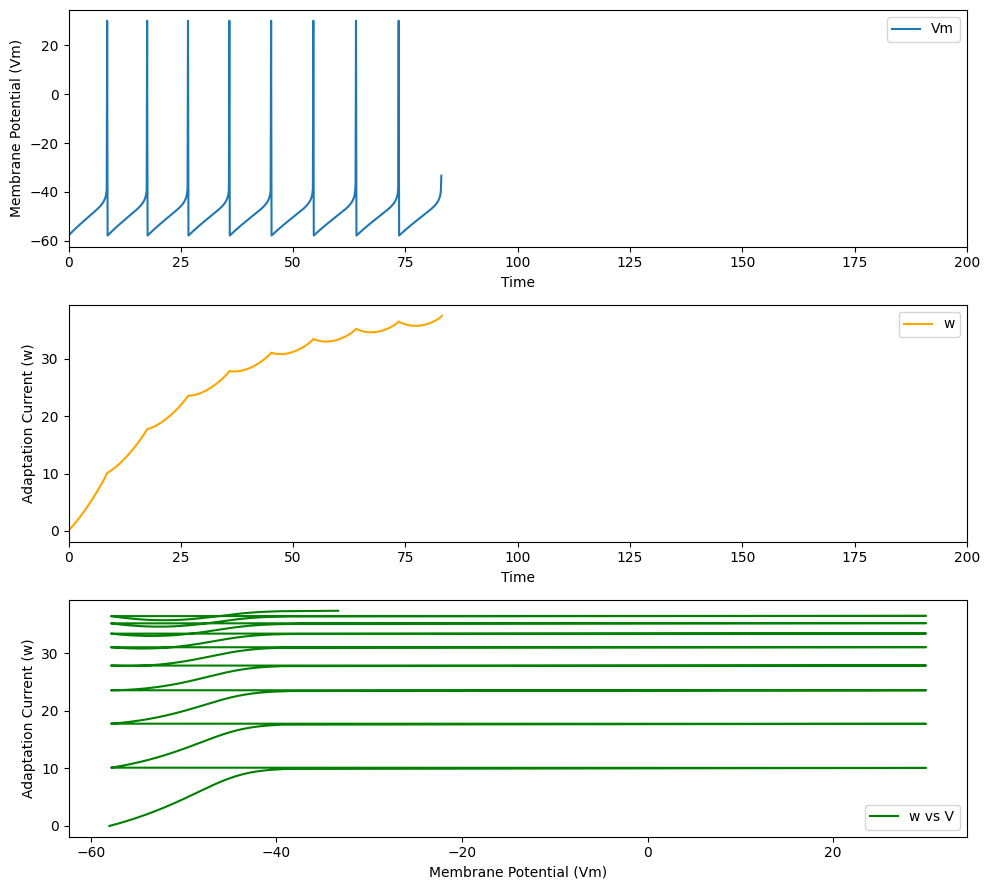

In [ ]:
ex_tonic = Experiment()
adex_model_tonic = AdExModel(ex_tonic, 'tonic')

adex_model_tonic.stimulate(200, 10, -70, -50, 2, 2, 30, 0, -58, 500)

adex_model_tonic.plot_results()

## 2) Adaptation

Inside AdEx firing...
Inside AdEx store data...


<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: invalid value encountered in double_scalars
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


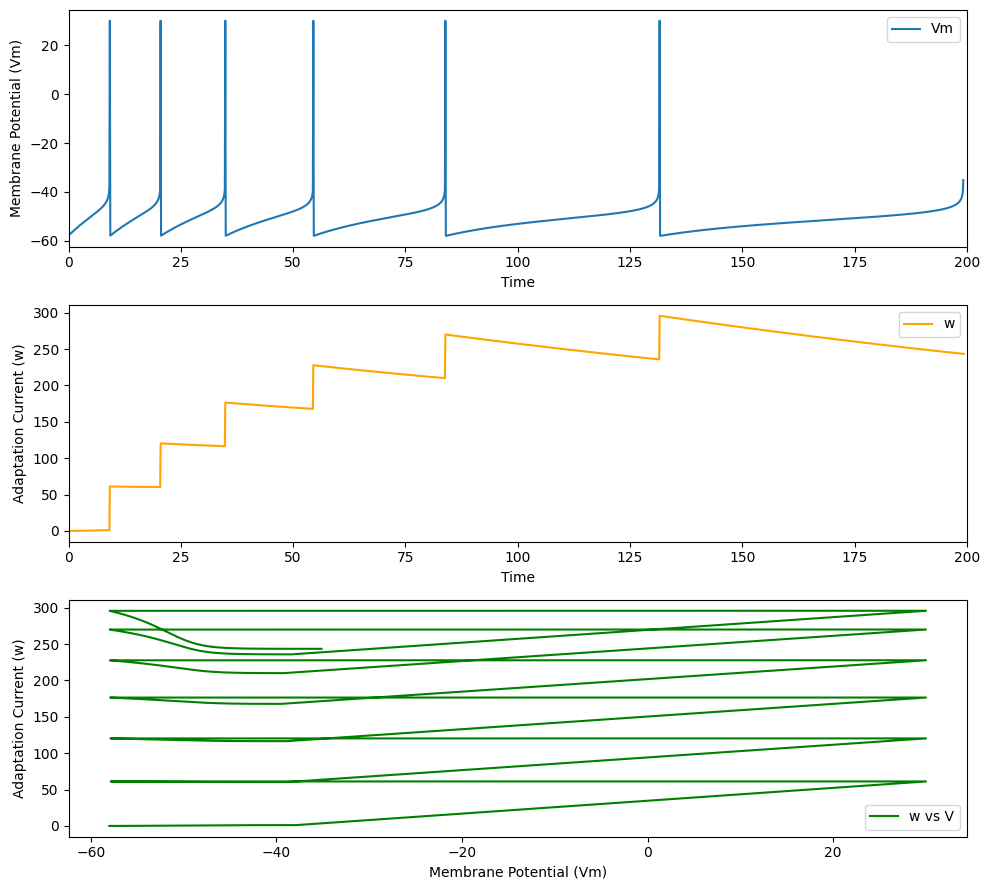

In [ ]:
ex_adaptation = Experiment()
adex_model_adaptation = AdExModel(ex_adaptation, 'adaptation')

adex_model_adaptation.stimulate(200, 12, -70, -50, 2, 2, 300, 60, -58, 500)

adex_model_adaptation.plot_results()

## 3) Initial Burst

Inside AdEx firing...
Inside AdEx store data...


<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


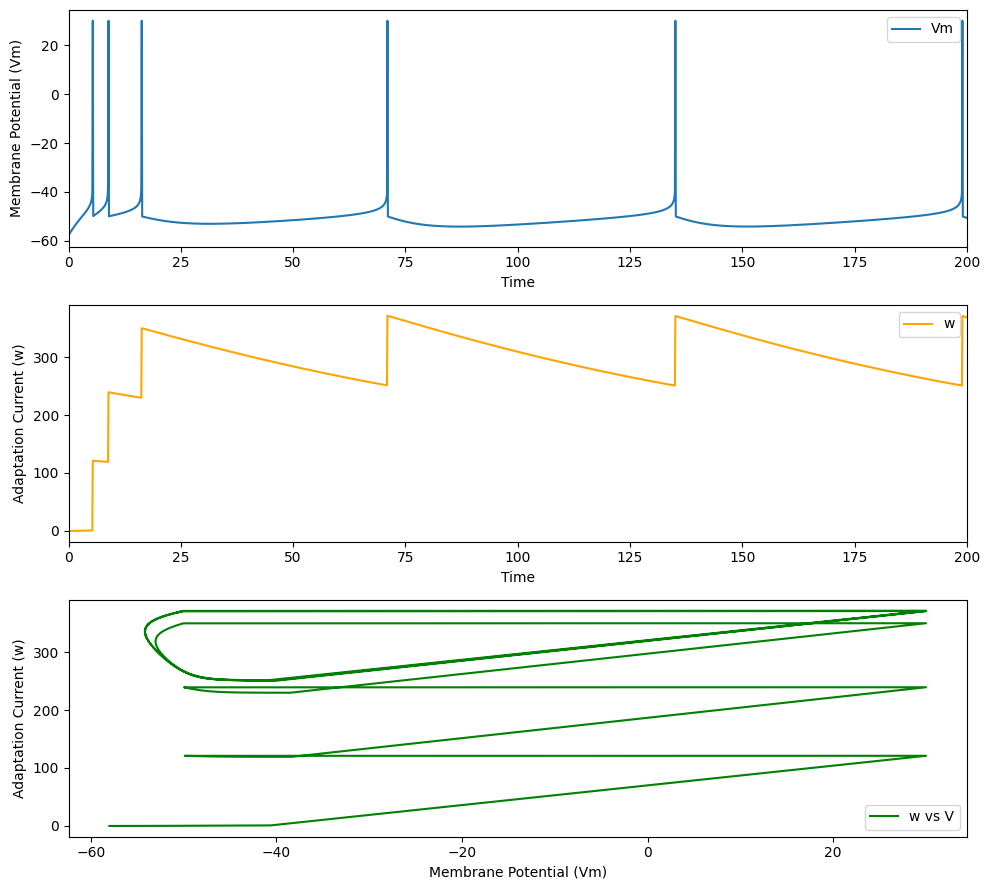

In [ ]:
ex_initial = Experiment()
adex_model_initial = AdExModel(ex_initial, 'initial')

adex_model_initial.stimulate(130, 18, -58, -50, 2, 4, 150, 120, -50, 400)

adex_model_initial.plot_results()

## 4) Regular Bursting

Inside AdEx firing...
Inside AdEx store data...


<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


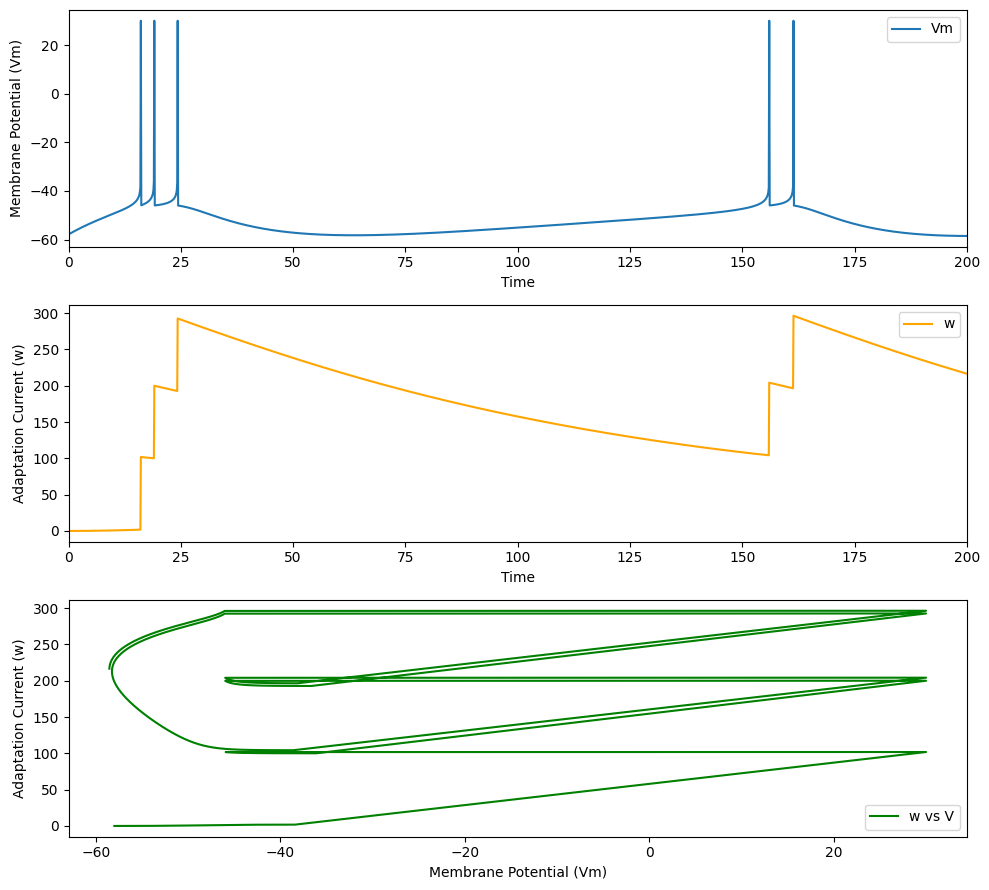

In [ ]:
ex_regular = Experiment()
adex_model_regular = AdExModel(ex_regular, 'regular')

adex_model_regular.stimulate(200, 10, -58, -50, 2, 2, 120, 100, -46, 210)

adex_model_regular.plot_results()

## 5) Delayed Accelerating

Inside AdEx firing...
Inside AdEx store data...


<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: invalid value encountered in double_scalars
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


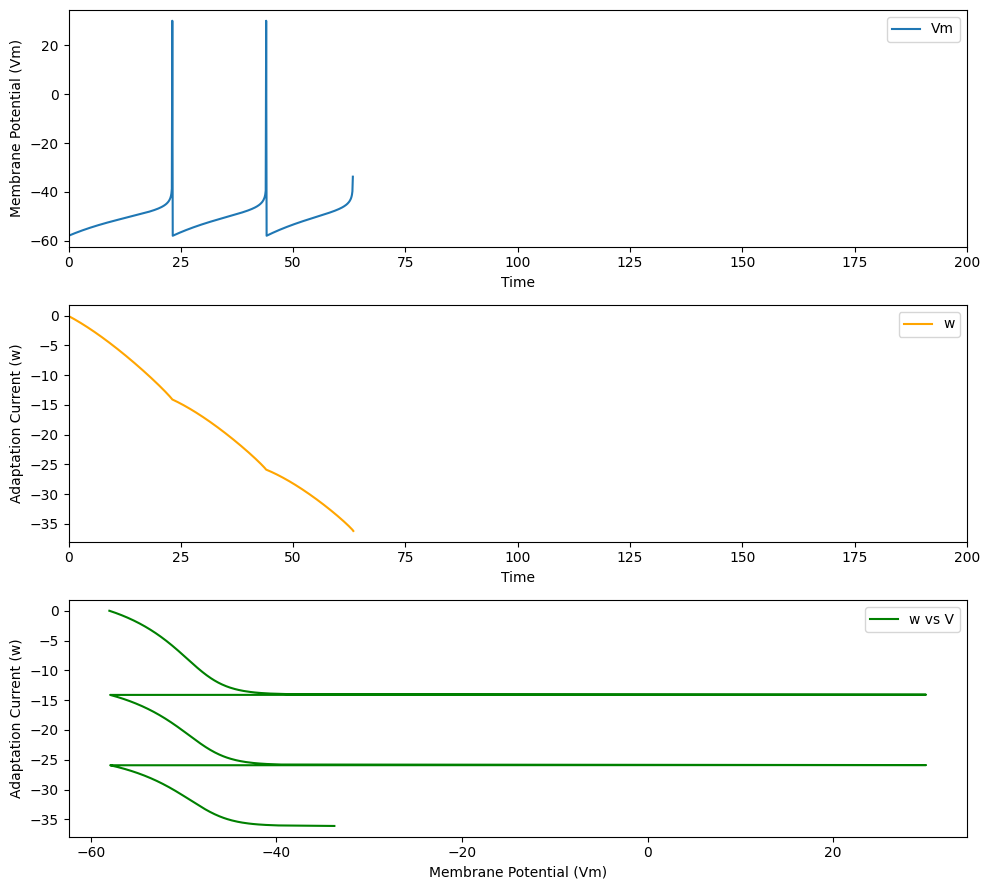

In [ ]:
ex_delayed_accelerating = Experiment()
adex_model_delayed_accelerating = AdExModel(ex_delayed_accelerating, 'delayed_accelerating')

adex_model_delayed_accelerating.stimulate(200, 12, -70, -50, 2, -10, 300, 0, -58, 300)

adex_model_delayed_accelerating.plot_results()

## 6) Delayed Regular Bursting

Inside AdEx firing...
Inside AdEx store data...


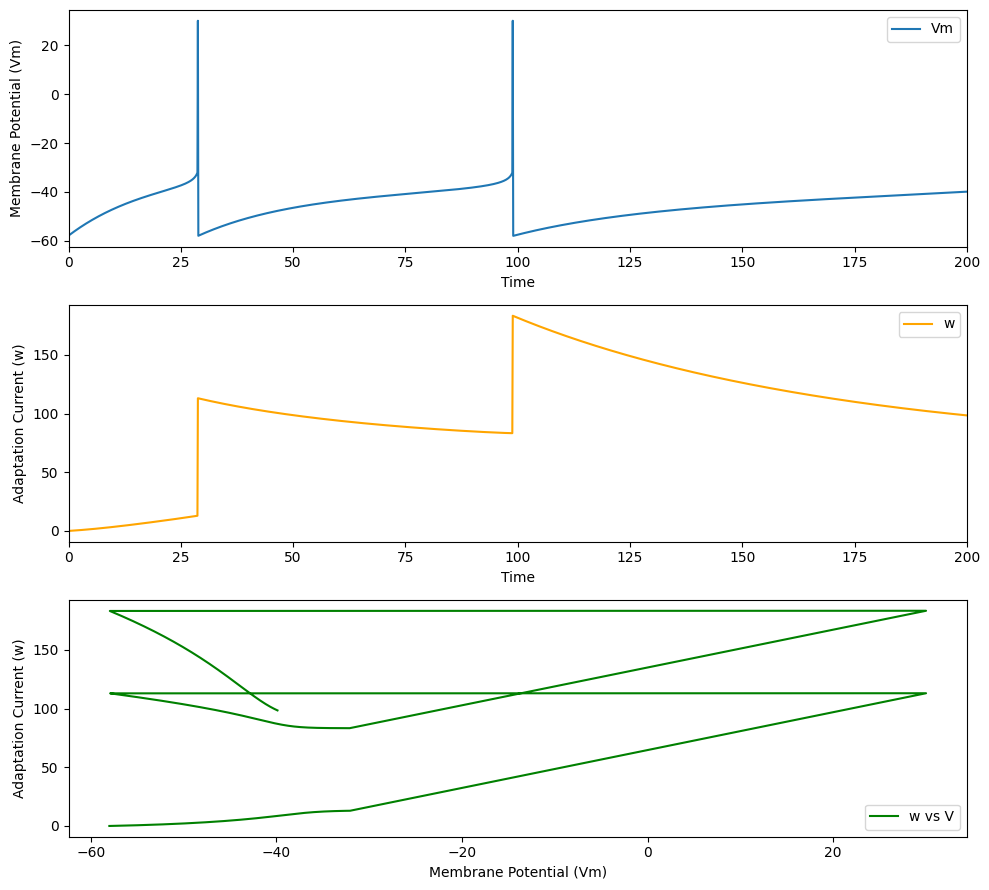

In [ ]:
ex_delayed_regular_bursting = Experiment()
adex_model_delayed_regular_bursting = AdExModel(ex_delayed_regular_bursting, 'delayed_regular_bursting')

adex_model_delayed_regular_bursting.stimulate(200, 10, -70, -40, 2, 2, 100, 100, -58, 400)

adex_model_delayed_regular_bursting.plot_results()

## 7) Transient Spiking

Inside AdEx firing...
Inside AdEx store data...


<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: overflow encountered in exp
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)
<ipython-input-12-352eb4bc9cfd>:119: RuntimeWarning: invalid value encountered in double_scalars
  return ((-self.Gl * (v - self.El) + self.Gl * self.delta * (np.exp((v - self.Vt) / self.delta)) - w + input) / self.Cm)


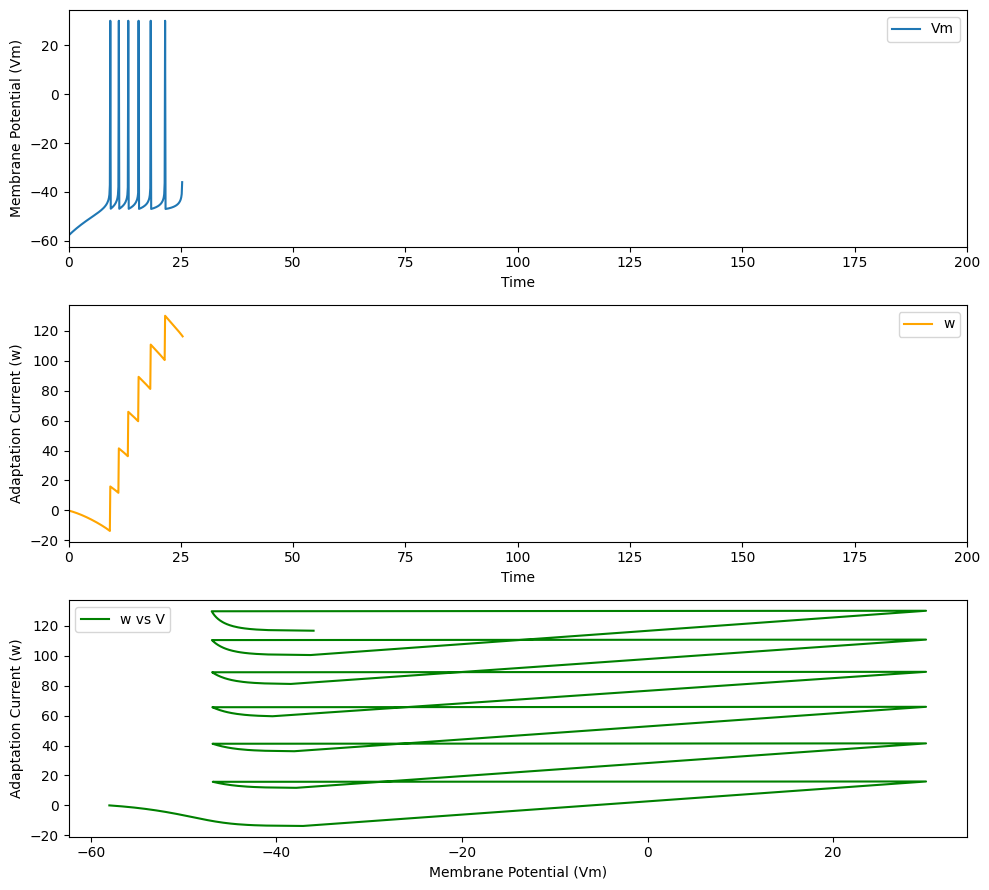

In [ ]:
ex_transient_spiking = Experiment()
adex_model_transient_spiking = AdExModel(ex_transient_spiking, 'transient_spiking')

adex_model_transient_spiking.stimulate(100, 10, -65, -50, 2, -10, 90, 30, -47, 250)

adex_model_transient_spiking.plot_results()

## 8) Irregular Spiking

Inside AdEx firing...
Inside AdEx store data...


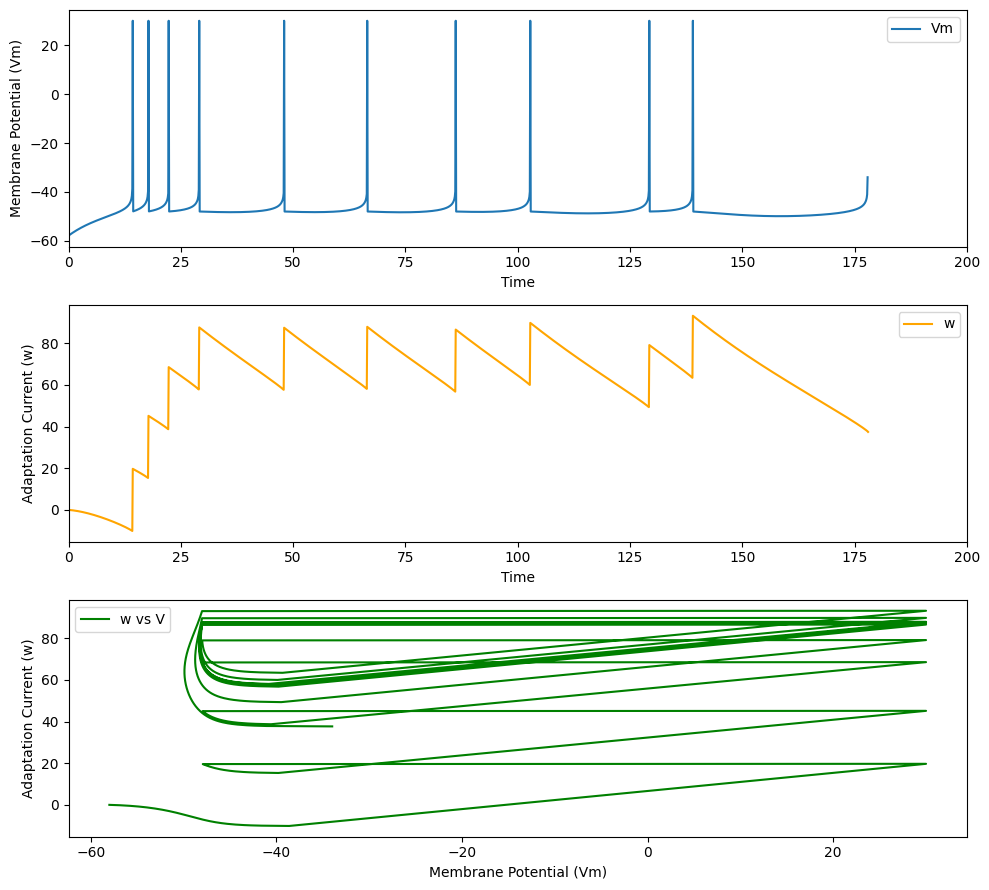

In [ ]:
ex_irregular_spiking = Experiment()
adex_model_irregular_spiking = AdExModel(ex_irregular_spiking, 'irregular_spiking')

adex_model_irregular_spiking.stimulate(100, 12, -60, -50, 2, -11, 130, 30, -48, 160)

adex_model_irregular_spiking.plot_results()